# Hands-On Exercise 4.1:
# Performing Regression Analysis of Structured Data With Python
***

## Objectives

#### In this exercise, you will perform regression analysis on structured data using Python. This exercise allows you to predict a target variable from a number of predictor variables. The goal is to show you how regression can be used to predict unknown values from a model trained on an existing data set.

### Overview

You will work on a data set called Prestige that is included with the car package.

You will:<br>
● Review the distribution of the target variable<br>
● Examine the data set for correlated variables<br>
● Define a linear model that best describes data from which we can make future predictions<br><br>

**Pre-step: Execute the following cell in order to suppress warning messages**

In [1]:
import warnings
warnings.filterwarnings("ignore")

**Data loading and text preprocessing**

1. ❏ Load the **pandas** and **stasmodel.api** libraries and import the **Prestige** dataset from the **carData** package

In [3]:
import pandas as pd
import statsmodels.api as sm

In [6]:
prestige = sm.datasets.get_rdataset("Prestige", "carData").data

2. ❏ Examine the structure of the Prestige data set using the **.shape, .columns** and **.dtypes** attributes, and preview the data

In [7]:
prestige.shape

(102, 6)

In [8]:
prestige.columns

Index(['education', 'income', 'women', 'prestige', 'census', 'type'], dtype='object')

In [9]:
prestige.dtypes

education    float64
income         int64
women        float64
prestige     float64
census         int64
type          object
dtype: object

In [10]:
prestige

,education,income,women,prestige,census,type
gov.administrators,13.11,12351,11.16,68.8,1113,prof
general.managers,12.26,25879,4.02,69.1,1130,prof
accountants,12.77,9271,15.70,63.4,1171,prof
purchasing.officers,11.42,8865,9.11,56.8,1175,prof
chemists,14.62,8403,11.68,73.5,2111,prof
...,...,...,...,...,...,...
bus.drivers,7.58,5562,9.47,35.9,9171,bc
taxi.drivers,7.93,4224,3.59,25.1,9173,bc
longshoremen,8.37,4753,0.00,26.1,9313,bc
typesetters,10.00,6462,13.58,42.2,9511,bc


In [11]:
prestige.describe

<bound method NDFrame.describe of                      education  income  women  prestige  census  type
gov.administrators       13.11   12351  11.16      68.8    1113  prof
general.managers         12.26   25879   4.02      69.1    1130  prof
accountants              12.77    9271  15.70      63.4    1171  prof
purchasing.officers      11.42    8865   9.11      56.8    1175  prof
chemists                 14.62    8403  11.68      73.5    2111  prof
...                        ...     ...    ...       ...     ...   ...
bus.drivers               7.58    5562   9.47      35.9    9171    bc
taxi.drivers              7.93    4224   3.59      25.1    9173    bc
longshoremen              8.37    4753   0.00      26.1    9313    bc
typesetters              10.00    6462  13.58      42.2    9511    bc
bookbinders               8.55    3617  70.87      35.2    9517    bc

[102 rows x 6 columns]>

3. ❏ Examine the distribution of the target variable **prestige** within the **Prestige** dataset

<bound method NDFrame.describe of gov.administrators     68.8
general.managers       69.1
accountants            63.4
purchasing.officers    56.8
chemists               73.5
                       ... 
bus.drivers            35.9
taxi.drivers           25.1
longshoremen           26.1
typesetters            42.2
bookbinders            35.2
Name: prestige, Length: 102, dtype: float64>

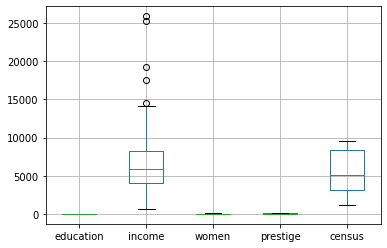

In [21]:
prestige.boxplot()
prestige.prestige.describe

4. ❏ Is there a difference between the mean and the median? What might this
indicate?

5. ❏ Generate a **histogram** of the variable<br><br>
*Hint: It may be necessary to execute the command twice for graph to display*

<AxesSubplot:>

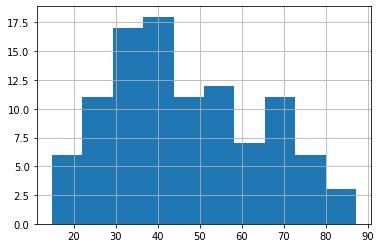

In [23]:
prestige["prestige"].hist()

6. ❏ Use a **barplot** to take a look at the distribution of the levels of the **type** attribute<br><br>
*Hint: Use the .value_counts() method*

<AxesSubplot:>

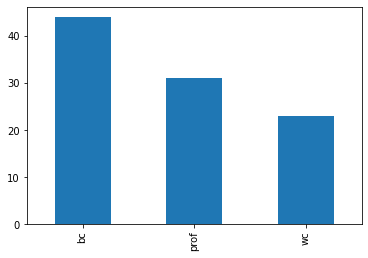

In [40]:
prestige.type.value_counts().plot(kind='bar')

7. ❏ Use a **scatterplot** to see if there is a correlation between the variable *women* and the target variable *prestige*

<AxesSubplot:xlabel='prestige', ylabel='women'>

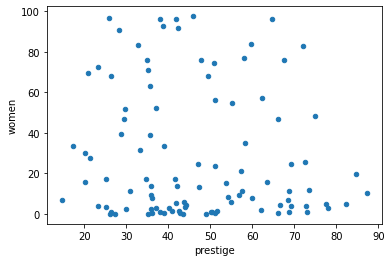

In [45]:
prestige.plot.scatter(x='prestige', y='women')

8. ❏ Create a **correlation matrix** to examine the relationship between the variables in the dataset

In [46]:
prestige.corr()

,education,income,women,prestige,census
education,1.000000,0.577580,0.061853,0.850177,-0.823088
income,0.577580,1.000000,-0.441059,0.714906,-0.361002
women,0.061853,-0.441059,1.000000,-0.118334,-0.227003
prestige,0.850177,0.714906,-0.118334,1.000000,-0.634510
census,-0.823088,-0.361002,-0.227003,-0.634510,1.000000


so the income to eduction -> .577580 is somewhat concerning
The Income to Women, while lower, is still concerning -> -0.441059


9. ❏ Visualize the relationship between the *education*, *income* and *women* variables using the **pairplot()** function from the **seaborn** package<br><br>
*Hint: You will need to import the seaborn package*

In [47]:
import seaborn as sea

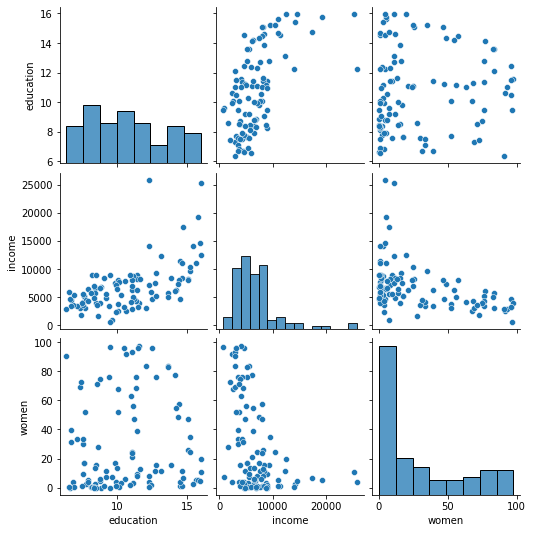

In [49]:
sea.pairplot(prestige[["education", "income", "women"]])

10. ❏ Are there patterns in the plots?

Yes

11. ❏ Import **ols** from **statsmodels.formula.api** library

In [77]:
from statsmodels.formula.api import ols
import numpy as np

12. ❏ Using the **ols()** function, fit a linear regression model to relate the independent
variables to the target variable

In [79]:
linearReg1 = ols(formula='prestige ~ education + income + women + type + census', data = prestige).fit()
linearReg2 = ols(formula='prestige ~ education', data = prestige).fit()
linearReg3 = ols(formula='prestige ~ income', data = prestige).fit()
linearReg4 = ols(formula='prestige ~ education + income', data = prestige).fit()
linearReg5 = ols(formula='prestige ~ education + income + type', data = prestige).fit()
linearReg6 = ols(formula='prestige ~ education + type', data = prestige).fit()
linearReg7 = ols(formula='prestige ~ education + np.sqrt(income) + type', data = prestige).fit()

In [72]:
print(linearReg1.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     80.25
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           3.58e-34
Time:                        10:35:31   Log-Likelihood:                -326.64
No. Observations:                  98   AIC:                             667.3
Df Residuals:                      91   BIC:                             685.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -12.1297      8.018     -1.513   

13. ❏ View the model using the **summary()** method to see the estimated coefficients

In [68]:
print(linearReg2.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     260.8
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           1.29e-29
Time:                        10:34:11   Log-Likelihood:                -369.00
No. Observations:                 102   AIC:                             742.0
Df Residuals:                     100   BIC:                             747.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.7320      3.677     -2.919      0.0

In [69]:
print(linearReg3.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     104.5
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           3.19e-17
Time:                        10:34:16   Log-Likelihood:                -397.94
No. Observations:                 102   AIC:                             799.9
Df Residuals:                     100   BIC:                             805.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.1412      2.268     11.969      0.0

In [71]:
print(linearReg4.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     195.6
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           4.12e-35
Time:                        10:34:56   Log-Likelihood:                -352.86
No. Observations:                 102   AIC:                             711.7
Df Residuals:                      99   BIC:                             719.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.8478      3.219     -2.127      0.0

In [74]:
print(linearReg5.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     117.5
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           1.70e-35
Time:                        10:36:59   Log-Likelihood:                -328.51
No. Observations:                  98   AIC:                             667.0
Df Residuals:                      93   BIC:                             679.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.6229      5.228     -0.119   

In [78]:
print(linearReg6.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     123.4
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           1.76e-32
Time:                        10:55:33   Log-Likelihood:                -338.50
No. Observations:                  98   AIC:                             685.0
Df Residuals:                      94   BIC:                             695.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.6982      5.736     -0.470   

In [81]:
print(linearReg7.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     128.8
Date:                Wed, 23 Mar 2022   Prob (F-statistic):           4.87e-37
Time:                        10:56:34   Log-Likelihood:                -324.75
No. Observations:                  98   AIC:                             659.5
Df Residuals:                      93   BIC:                             672.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -9.4031      5.159     

So the lowest Cond. No. has just Eductation + Type. 
However the Eductation + np.sqrt(income) + type has a higher R/Adj-R value, but a much higher Cond. No. 

In practice, the Adj-R^2 and Cond. No. have no hard-rules to dictate a good or bad model. What matters is how this behaves on new, real-world data. 
In this case, likely both the (Eductation + Type) and (Eductation + np.sqrt(income) + type) models should be tested with new/real data. 

The question is, Is this good enough?

To use Linear Regression, the data needs to follow certain rules. 
- One such rule: the data should be normally distributed around the plot
- Another assumption: The data is homoscedastic -> Data is homoscedastic if it has the same variance at both the high and low end of data. 
    -- For example. Income data is NOT homoscedastic. Low income 

Heteroscedastic -> variance changes from low to high end of data. 

In [84]:
prestige.describe()

,education,income,women,prestige,census
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,10.738039,6797.901961,28.979020,46.833333,5401.774510
std,2.728444,4245.922227,31.724931,17.204486,2644.993215
min,6.380000,611.000000,0.000000,14.800000,1113.000000
25%,8.445000,4106.000000,3.592500,35.225000,3120.500000
50%,10.540000,5930.500000,13.600000,43.600000,5135.000000
75%,12.647500,8187.250000,52.202500,59.275000,8312.500000
max,15.970000,25879.000000,97.510000,87.200000,9517.000000


In [88]:
from statsmodels.graphics.gofplots import qqplot


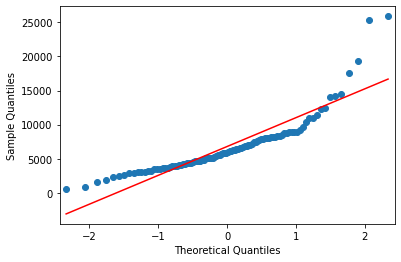

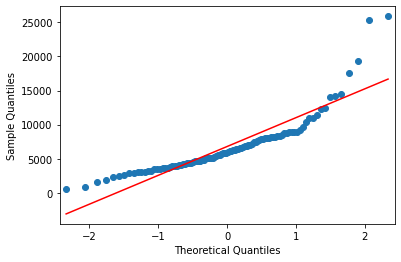

In [93]:
qqplot(data=prestige["income"], line='s')
plt.show()

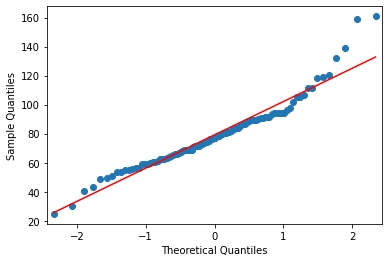

In [94]:
qqplot(data=np.sqrt(prestige["income"]), line='s')
plt.show()

14. ❏ When all the independent values are zero, what is the value of the target?

intercept = -12.1297

15. ❏ How well does the model fit the data? (i.e. how much of its variance is explained by the model?)

R-val - 0.835 -> Decent fit!

16. ❏ Does the model have statistically significant variables?

Yes -> type[T.prof], Education, Income

## <center>**Congratulations! You have completed the exercise.**</center>

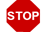

# <center>**This is the end of the exercise.**</center>